# Named Entity Recognition (NER)

Named entity recognition (NER) is the task of locating and classifying
named entities mentioned in unstructured text into predefined categories such as
names, organizations, locations, medical codes, time expressions, quantities, monetary values, and percentages.

This notebook will show how to train and evaluate our own NER model using the
simpletransformers library and BERT.
To train the model the CoNLL003 dataset from [kaggle](www.kaggle.com) is used. This dataset is for an annotated Named Entity Recognition (NER) problem.

## Preparations

**note:**<br>
 make sure that you use an GPU for that operation.
To train the model will take several time and with a GPU you can fasten that task. 

In [ ]:
# Note: after installing simpletransformers, one must restart the runtime

!pip install simpletransformers

To download a dataset from [kaggle.com](www.kaggle.com), one must sign up for an account first.<br><br>
Here, there are 2 ways shown, how to load the data set into colab:
- upload file from a local storage
- load dataset directly from kaggle.com

To download directly from kaggle there is an [official kaggle-api](https://github.com/Kaggle/kaggle-api) which makes the usage very easy.

Structure the colab environment for the data set from [kaggle.com](www.kaggle.com) as follows:

content/
>> kaggle/
>>> News_Category_Dataset_v2.json 


In [5]:
# Create 'kaggle' folder
!mkdir '/content/kaggle'

#### Upload data set from a local storage

In [ ]:
from google.colab import files

files.upload()

#### Download data set from kaggle.com via api


* Create api-token:<br>
To use the Kaggle API, sign up for a Kaggle account at https://www.kaggle.com. 
Then go to the 'Account' tab of your user profile (https://www.kaggle.com/<username>/account) and 
select 'Create API Token'. This will trigger the download of kaggle.json, a file containing your API credentials. 
Place this file in the location 'root/.kaggle/kaggle.json'.

* Secure your api-token:<br>
For your security, ensure that other users of your computer do not have read access to your credentials.
On Unix-based systems you can do this with the following command:
chmod 600 ~/.kaggle/kaggle.json

In [11]:
# Prepare folders in colab environment
import os

# os.mkdir('/root/.kaggle')
os.chdir('/root/.kaggle')

In [ ]:
# After downloading the api-token, bring it into colab:

from google.colab import files

files.upload()

In [13]:
# Change access of the api-token
os.chmod('/root/.kaggle/kaggle.json', 600)

# Get back to the kaggle folder
os.chdir('/content/kaggle')

In [14]:
# Download dataset
!kaggle datasets download -d alaakhaled/conll003-englishversion

  0% 0.00/960k [00:00<?, ?B/s]
100% 960k/960k [00:00<00:00, 49.0MB/s]


In [16]:
 # Unpack dataset
 
 !unzip conll003-englishversion.zip

Archive:  conll003-englishversion.zip
  inflating: metadata                
  inflating: test.txt                
  inflating: train.txt               
  inflating: valid.txt               


In [17]:
# Get back to default ('content/') location
!cd ..

## Load data set

We import all necessary libraries. Among the simpletransformers library,
we also need functions from scikit-learn (Pedregosa et al., 2011) and the Pandas library (Reback et al., 2020) to load and extract our training text corpus from the txt-file.
In google-colab, pandas and scikit-learn are pre-installed.

In [18]:
import pandas as pd
from simpletransformers.ner import NERModel
from sklearn.model_selection import train_test_split

In [20]:
# Read file content into DataFrame
data = []

def read_data(filename):
  """Read CoNLL corpus to Pandas DataFrame"""
  sentence_id = 0
  with open(filename) as f:
    for line in f:
      line = line.strip()
      if len(line):
        word, dep, pos, ner = line.split(" ", 3)
        data.append({ "sentence_id": sentence_id, "words": word, "labels": ner})
      else:
        sentence_id += 1
    return pd.DataFrame(data)

In [21]:
train_df = read_file_content('/content/kaggle/train.txt')

eval_df = read_file_content('/content/kaggle/valid.txt')

Look at some of the dataset entries:

In [27]:
train_df.head(3)

,sentence_id,words,labels
0,0,-DOCSTART-,O
1,1,EU,B-ORG
2,1,rejects,O


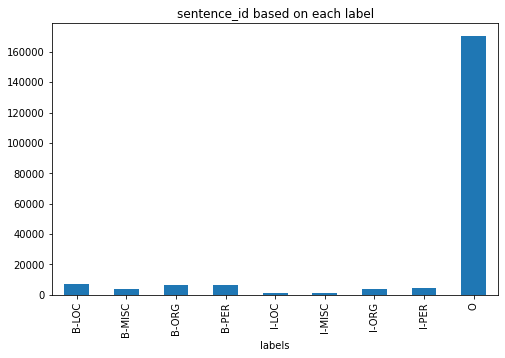

In [29]:
# Display sentence_id distribution
from matplotlib import pyplot as plt

ax = train_df.groupby("labels").count()["sentence_id"].plot(kind="bar", figsize=(8,5), title="sentence_id based on each label")

plt.show()

## Data Preparation

The NER model needs to get only unique labels. ``lables`` lists only the unique labels from ``trai_df``.

In [41]:
labels = list(train_df["labels"].unique())

## Create NER model

We use a model ``bert_base_uncased`` (uncased monolingual English version of BERT published by Google) from the ``bert`` model family.

In [23]:
model = NERModel('bert', 'bert-base-uncased', labels=labels)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

## Train model

We can start training our model. This automatically downloads the pre-trained
BERT model, initializes its parameters, and preprocesses our training data using a
subword tokenizer before the actual training process is started.

In [24]:
# Train the model
model.train_model(train_df)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/1874 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


(1874, 0.2161551919747631)

## Evaluation

We evaluate the model on our evaluation set.

In [25]:
# Evaluate the model
result, model_outputs, predictions = model.eval_model(eval_df)

  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1874 [00:00<?, ?it/s]

## Prediction

In [26]:
# Predictions on arbitrary text strings
predictions, raw_outputs = model.predict(["Tomorrow, Bill Gates will meet two " +
                                          "German friends in Berlin"])

for pre in predictions[0]:
  print(pre)

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

{'Tomorrow,': 'O'}
{'Bill': 'B-PER'}
{'Gates': 'I-PER'}
{'will': 'O'}
{'meet': 'O'}
{'two': 'O'}
{'German': 'B-MISC'}
{'friends': 'O'}
{'in': 'O'}
{'Berlin': 'B-LOC'}


Copyright © 2021 IU International University of Applied Sciences